# 텍스트 데이터의 비교분석과 시각화

## 비교분석

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

file_names = ["preprocessed_reviews_imdb.csv",
"preprocessed_reviews_metacritic.csv",
"preprocessed_reviews_rottentomatoes.csv"]

In [4]:
source_path = "../../database"
dataframes = [pd.read_csv(f"{source_path}/{file_name}") for file_name in file_names]


/var/folders/b9/7dsjng6d3nv8p8f5n4p65y4r0000gn/T/ipykernel_11281/1715334717.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words, x='count', y='word', ax=axes[i], palette='viridis')
/var/folders/b9/7dsjng6d3nv8p8f5n4p65y4r0000gn/T/ipykernel_11281/1715334717.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words, x='count', y='word', ax=axes[i], palette='viridis')
/var/folders/b9/7dsjng6d3nv8p8f5n4p65y4r0000gn/T/ipykernel_11281/1715334717.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words, x='count

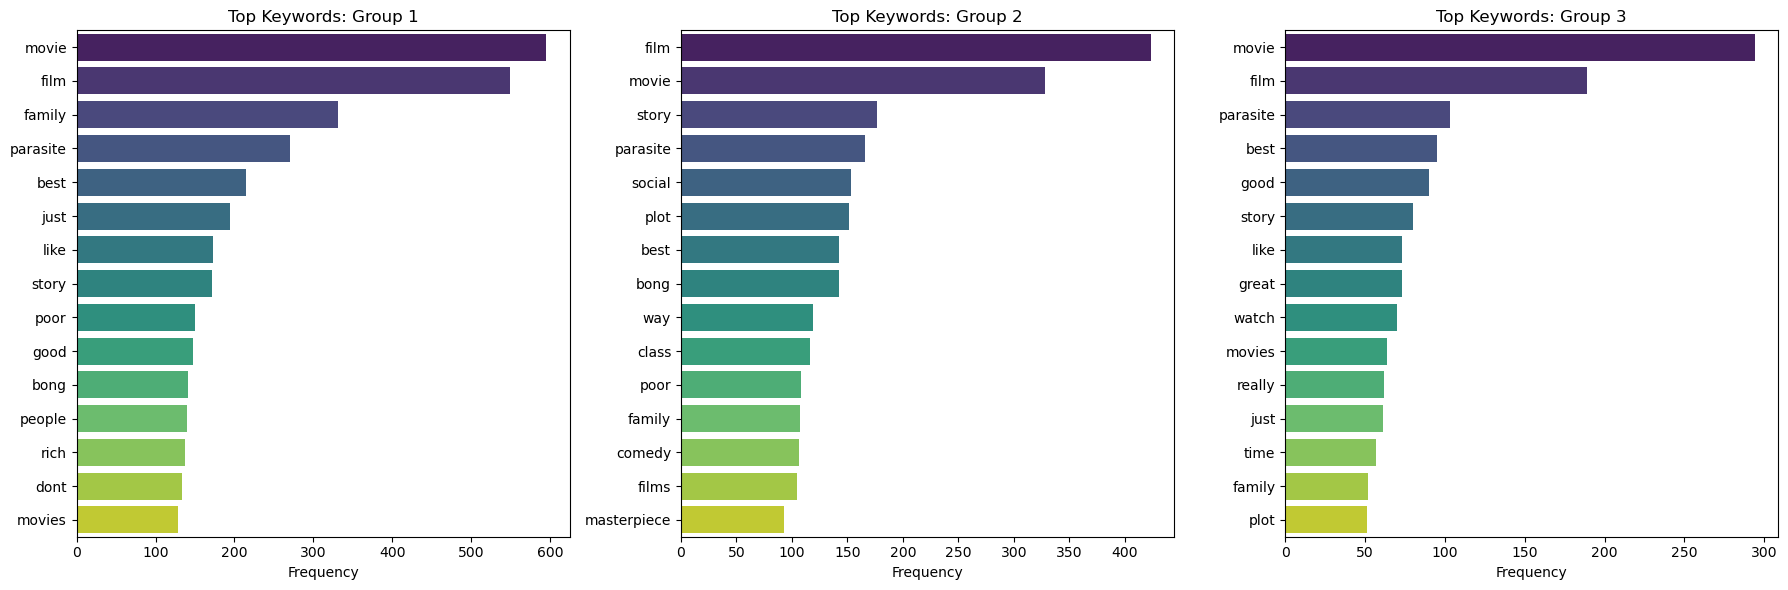

In [7]:
# 1행 3열의 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=False)
titles = ['Group 1', 'Group 2', 'Group 3'] # 각 DF의 이름

cv = CountVectorizer(stop_words='english')

for i, df in enumerate(dataframes):
    words_matrix = cv.fit_transform(df['content'])
    word_counts = words_matrix.sum(axis=0).A1
    word_freq = pd.DataFrame({'word': cv.get_feature_names_out(), 'count': word_counts})
    top_words = word_freq.sort_values('count', ascending=False).head(15)
    
    sns.barplot(data=top_words, x='count', y='word', ax=axes[i], palette='viridis')
    axes[i].set_title(f'Top Keywords: {titles[i]}')
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

## 시계열 분석

/var/folders/b9/7dsjng6d3nv8p8f5n4p65y4r0000gn/T/ipykernel_11281/4164631797.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df.set_index('date')['Extreme_score'].resample('M').mean()
/var/folders/b9/7dsjng6d3nv8p8f5n4p65y4r0000gn/T/ipykernel_11281/4164631797.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df.set_index('date')['Extreme_score'].resample('M').mean()
/var/folders/b9/7dsjng6d3nv8p8f5n4p65y4r0000gn/T/ipykernel_11281/4164631797.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df.set_index('date')['Extreme_score'].resample('M').mean()


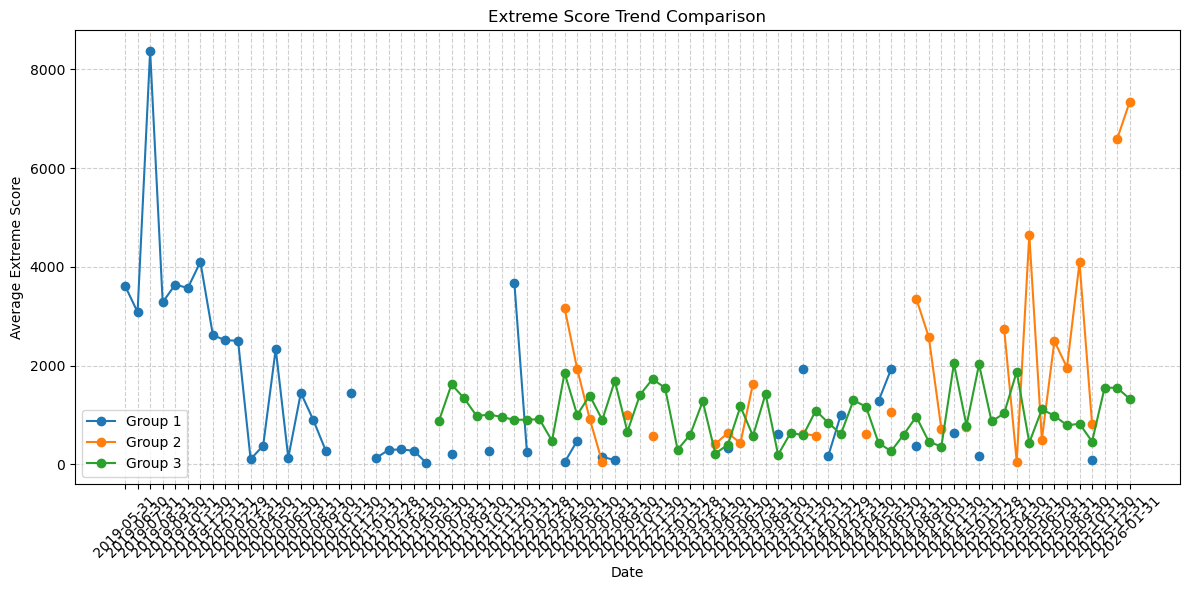

In [9]:
plt.figure(figsize=(12, 6))

for i, df in enumerate(dataframes):
    # 날짜 데이터 형식 확인 및 월별 리샘플링
    df['date'] = pd.to_datetime(df['date'])
    # 월 단위 평균 계산 (데이터 양에 따라 'W'(주) 또는 'D'(일)로 변경 가능)
    ts = df.set_index('date')['Extreme_score'].resample('M').mean()
    
    plt.plot(ts.index.astype(str), ts.values, marker='o', label=titles[i])

plt.title('Extreme Score Trend Comparison')
plt.xlabel('Date')
plt.ylabel('Average Extreme Score')
plt.xticks(rotation=45)
plt.legend() # 범례 표시
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()